In [9]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

print("Process Complete!")

Process Complete!


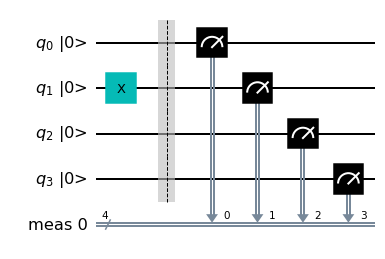

In [11]:
qc = QuantumCircuit(4)
qc.x(1)
qc.measure_all()
qc.draw(initial_state=True, output='mpl')

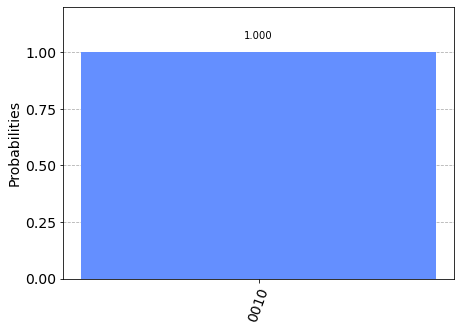

In [12]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

---
---

## Half Adder

---

<br>

<p style="text-align: center;"><i>The general frame of a Quantum Circuit</i></p>

<img src="./resources/i01_half_adder.png" width="50%"/>
<br>

We need to compute:

```
0 + 0 = 00  
0 + 1 = 01  
1 + 0 = 01  
1 + 1 = 11  
``` 

CNOT (Controlled NOT gate) is like a generalization of the classical XOR Gate.  
Just CNOT on q0 and q1 is enough for the XOR gate.  
But, we're using a third, target qubit, to make sure that the two input qubits do not get overwritten.  
Apply a Controlled-Controlled NOT Gate (CCNOT / Toffoli Gate) to get the carry.  




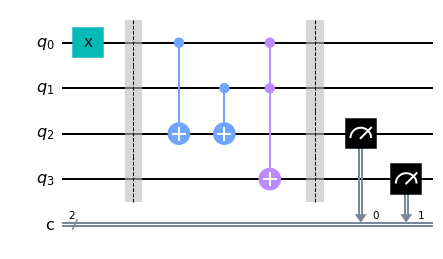

In [28]:
half_adder = QuantumCircuit(4,2)  # A quantum circuit with 4 qubits and 2 classical bits

# Change these depending on the input
inp0 = 1
inp1 = 0

if inp0 == 1:
    half_adder.x(0)
if inp1 == 1:
    half_adder.x(1)

half_adder.barrier()

# Sum Qubit
half_adder.cx(0,2)
half_adder.cx(1,2)

# Carry Qubit
half_adder.ccx(0,1,3)
half_adder.barrier()

# Get the output
half_adder.measure(2,0)  # (source qubit, target classical bit)
half_adder.measure(3,1)

half_adder.draw(output='mpl')

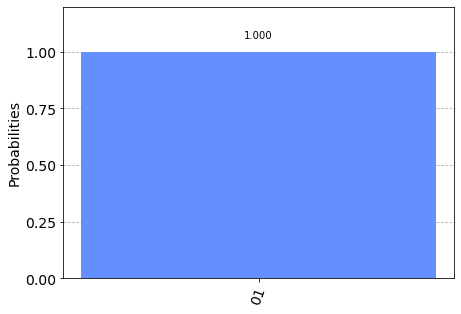

In [29]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(half_adder).result()
counts = result.get_counts()

plot_histogram(counts)

In [30]:
answer = 0
answer_shots = 0

for result in counts:
    shots = counts[result]
    if answer_shots < shots:
        answer_shots = shots
        answer = result

print("Result of {} + {} is: ".format(inp0,inp1), answer)

Result of 1 + 0 is:  01



---

The Toffoli Gate is functionally complete, which means that we recreate any circuit with just Toffoli Gates.  
Similar to how the NAND and NOR are Universal logic gates in classical computing.

---
<br>

In [32]:
import qiskit.tools.jupyter
%qiskit_version_table

C:\Users\aryam\anaconda3\lib\site-packages\qiskit\aqua\__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
